<a href="https://colab.research.google.com/github/yejikwon7/AI/blob/main/Autoencoder_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [2]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [3]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True) # target_transform: 정답 label 지정X
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.16MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.38MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True) # batch 단위로 들어감, shuffle: 중요한 차이점, data 남으면 사용X
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [5]:
# 인공신경망으로 이루어진 오토인코더를 생성합니다.
# 활성화 함수 생략
class Autoencoder(nn.Module): # 네트워크
    # affine layer로만 구성: 1차원 데이터 필요
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(28*28, 128)
        self.decoder = nn.Linear(128, 28*28) # 늘림

    # 코드 직접 실행
    def forward(self, x):
        x = x.view(batch_size, -1) # flatten
        encoded = self.encoder(x)
        out = self.decoder(encoded).view(batch_size, 1, 28, 28) # 원래 차원으로 재구성, 복원
        return out

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # gpu 사용
print(device)

model = Autoencoder().to(device) # device 설정된 상태로 모델에 올려주어야 함
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) # lr: step size 조절

cuda:0


In [7]:
loss_arr = [] # loss 저장
for i in range(num_epoch): # epoch 수행
    for j, [image, label] in enumerate(train_loader): # iteration 수행
        x = image.to(device) # 비지도 학습: y label 필요X

        optimizer.zero_grad()

        # noise 추가
        noise = init.normal_(torch.FloatTensor(batch_size, 1, 28, 28), 0, 0.1)
        image = image + noise
        image = image.to(device)

        output = model.forward(x)
        loss = loss_func(output, x) # 정답으로 사용하고자 하는 것 넣음
        loss.backward()
        optimizer.step()

        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(0.1264, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0298, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0197, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0135, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0113, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0094, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0084, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0069, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0072, device='cuda:0', grad_fn=<MseLossBackward0>)
tensor(0.0063, device='cuda:0', grad_fn=<MseLossBackward0>)


torch.Size([256, 28, 28])


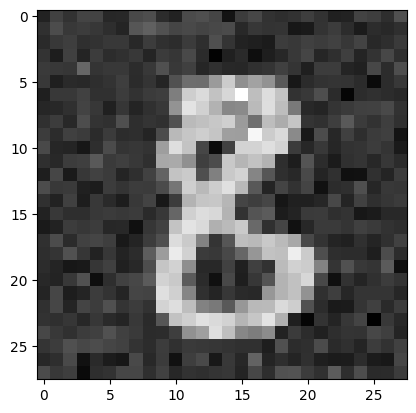

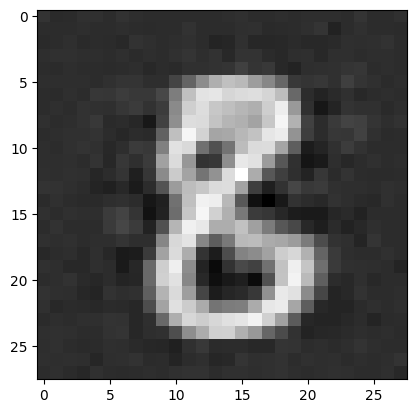

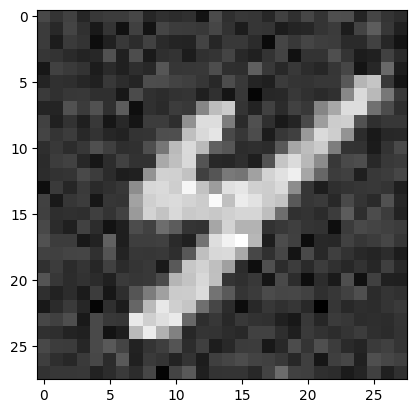

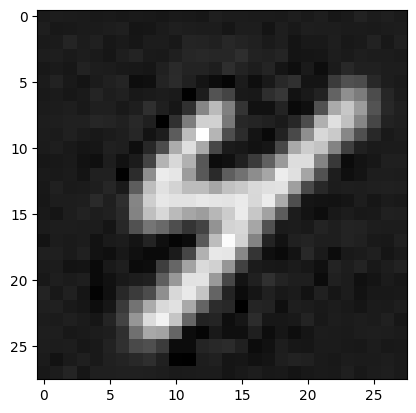

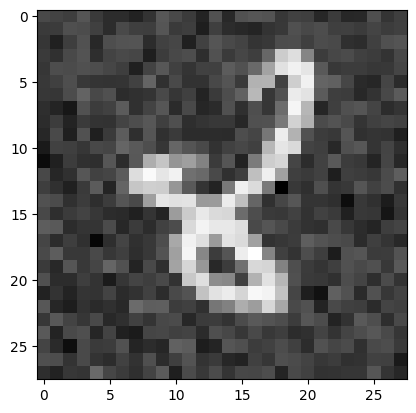

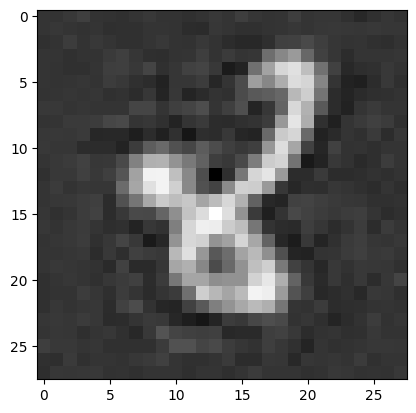

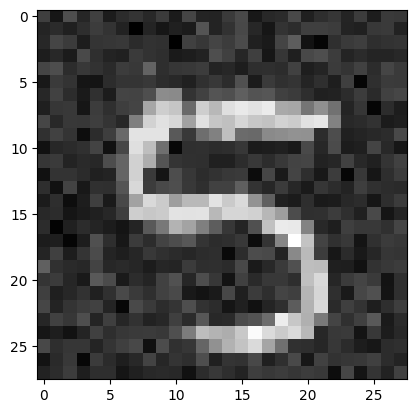

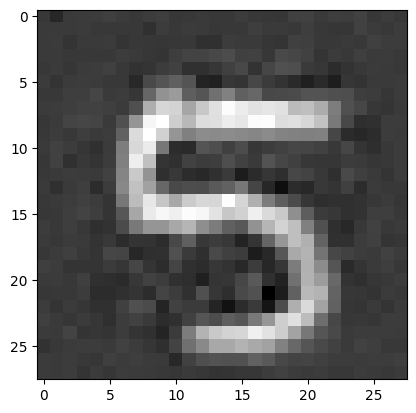

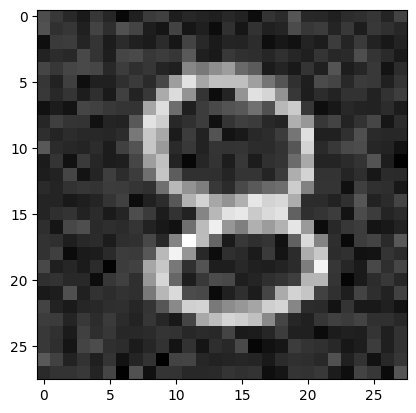

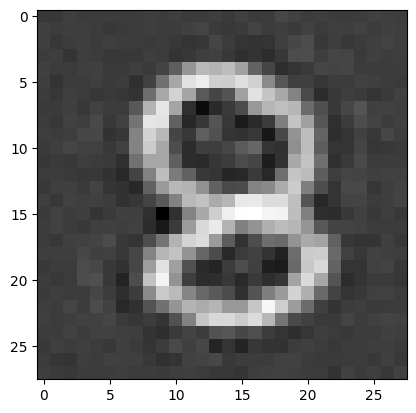

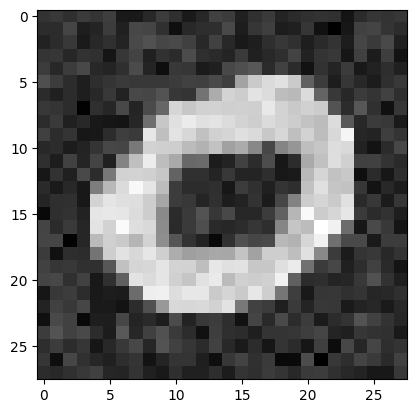

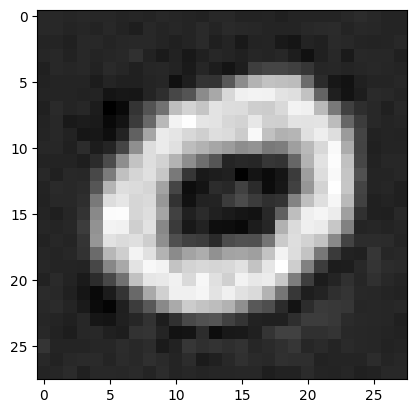

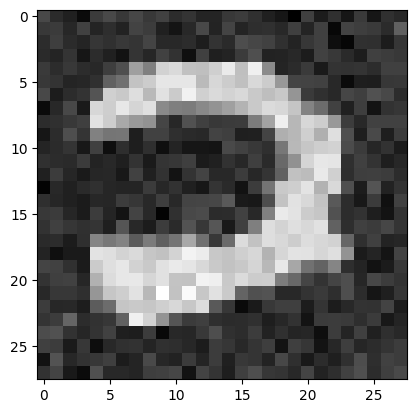

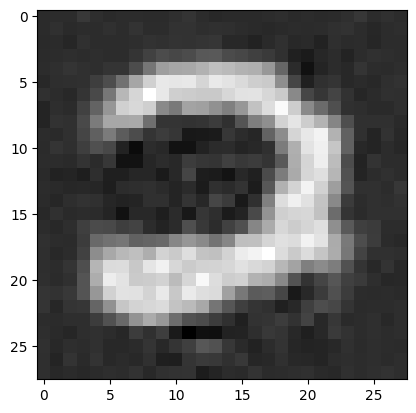

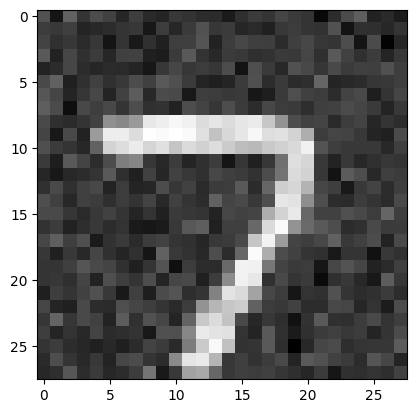

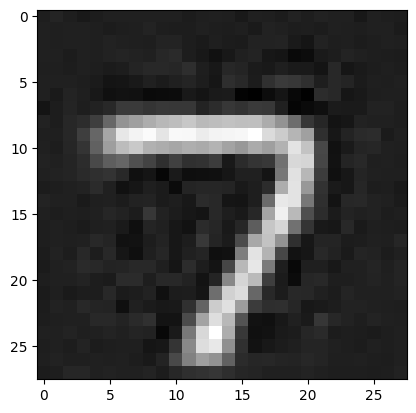

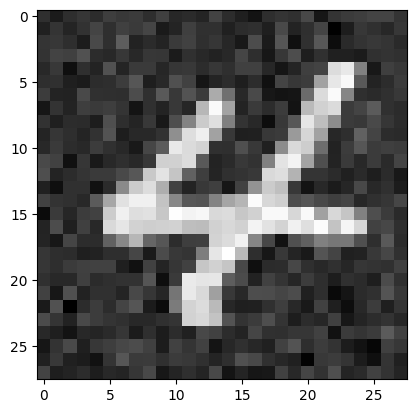

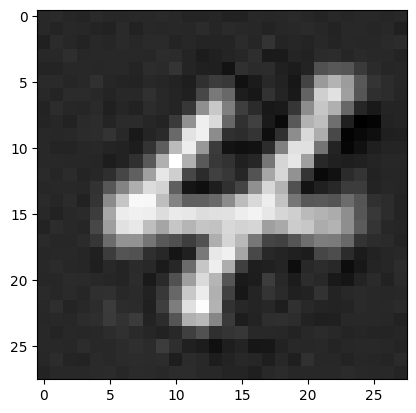

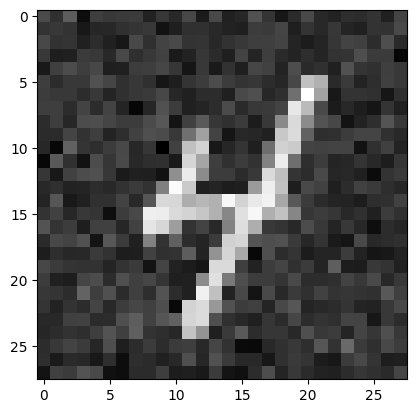

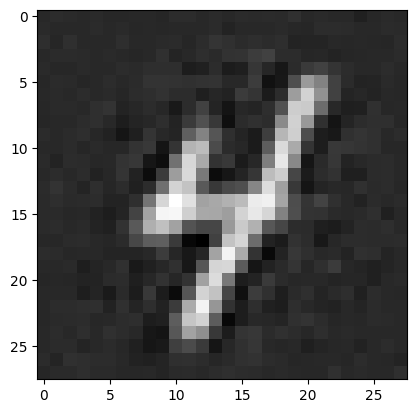

In [9]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).cpu().numpy(), cmap='gray') # 실제 데이터
    plt.show()
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()

In [10]:
with torch.no_grad():
    for i in range(1): # epoch 돌 필요X, 없어도 되는 코드
        for j, [image, label] in enumerate(test_loader):
            x = image.to(device)

            optimizer.zero_grad()

            # noise 추가
            noise = init.normal_(torch.FloatTensor(batch_size, 1, 28, 28), 0, 0.1)
            image = image + noise
            image = image.to(device)

            output = model.forward(x)

        if j % 1000 == 0:
            print(loss)

torch.Size([256, 28, 28])


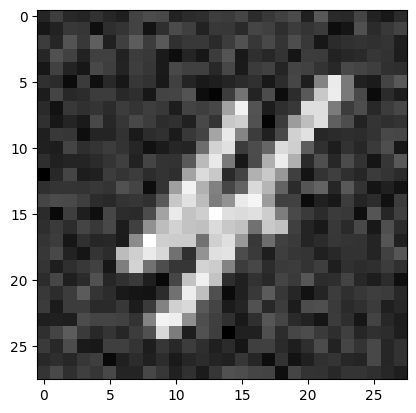

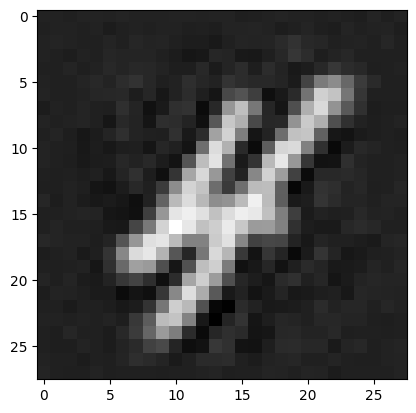

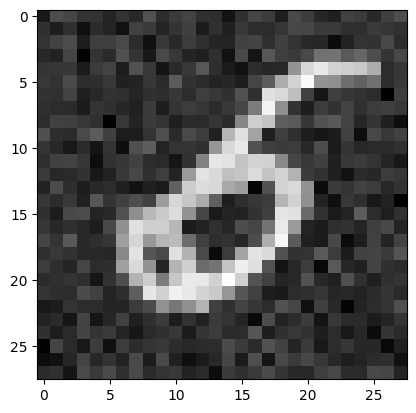

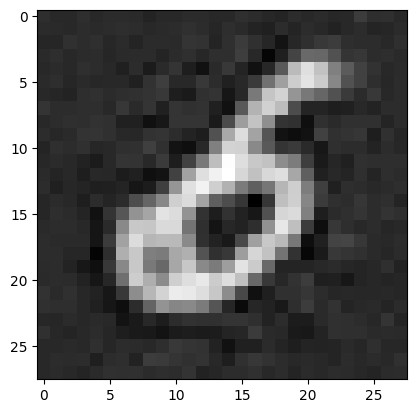

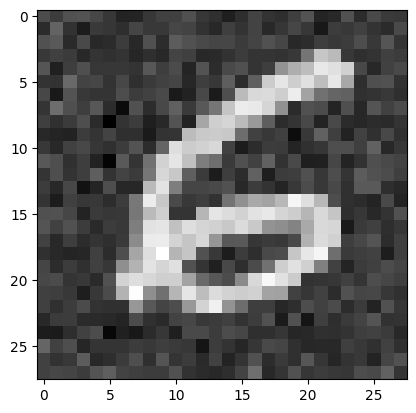

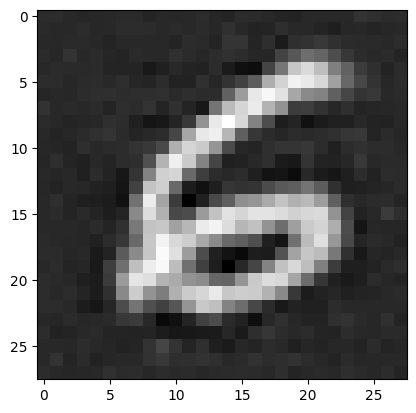

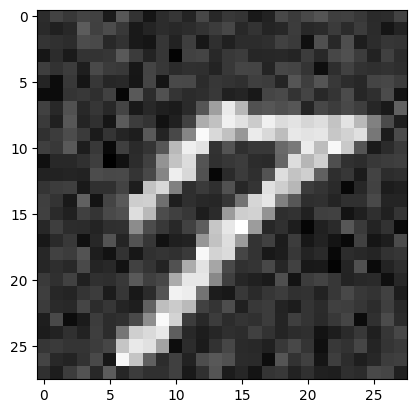

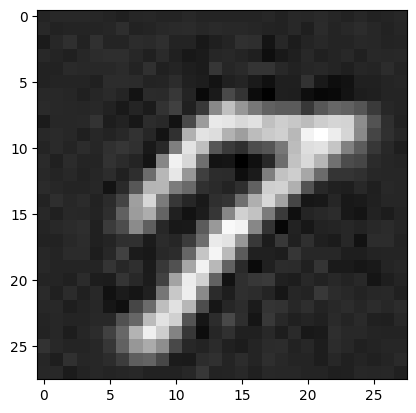

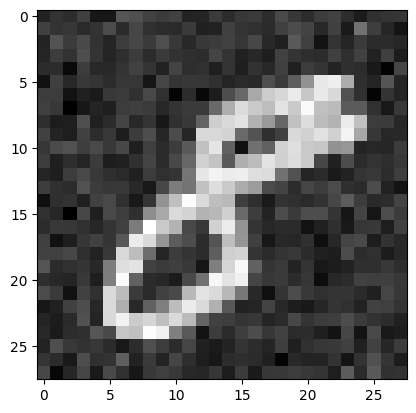

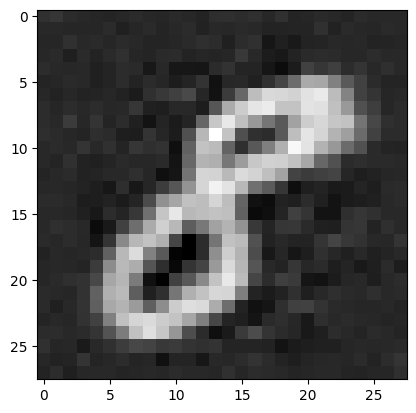

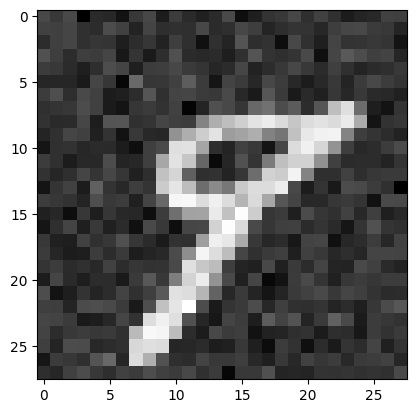

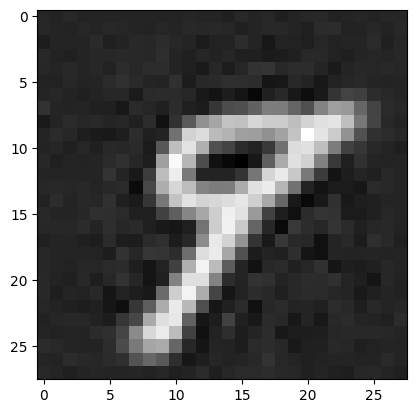

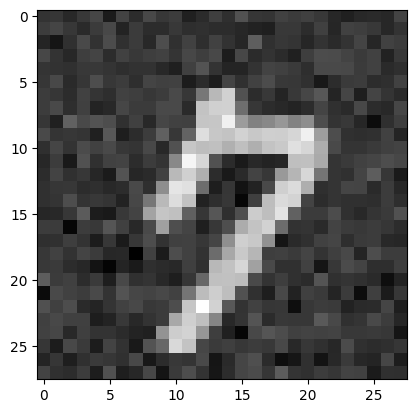

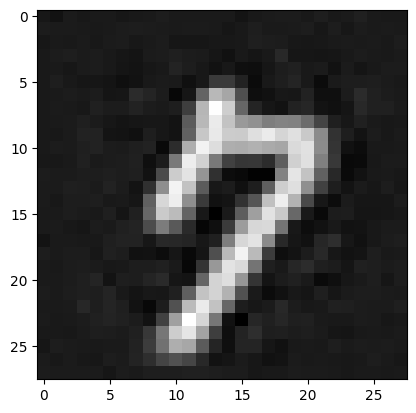

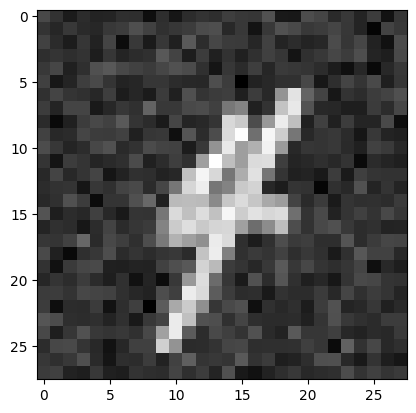

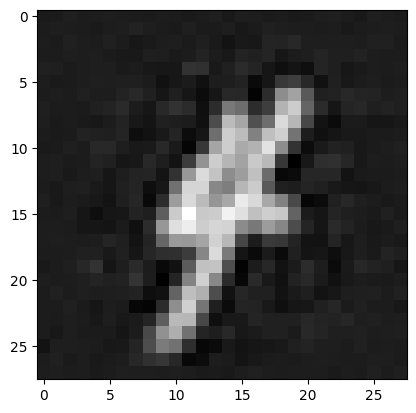

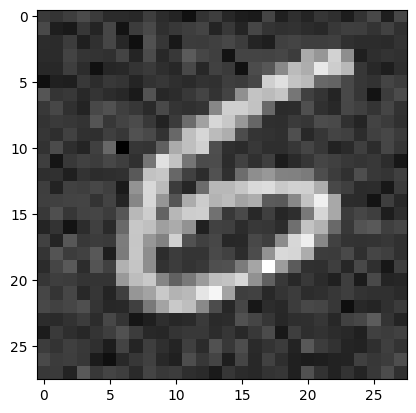

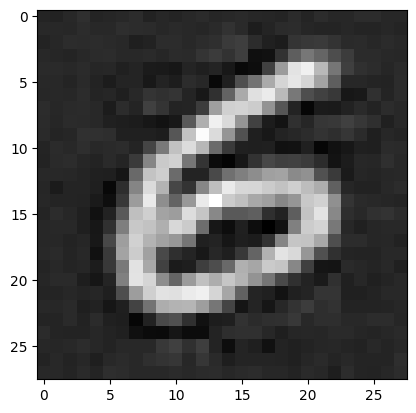

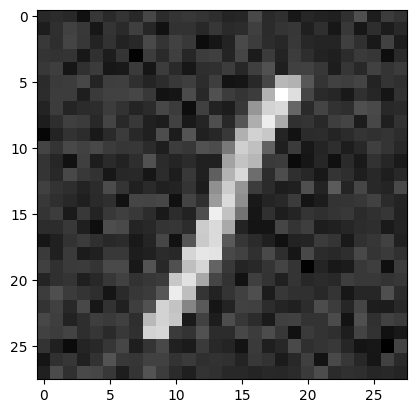

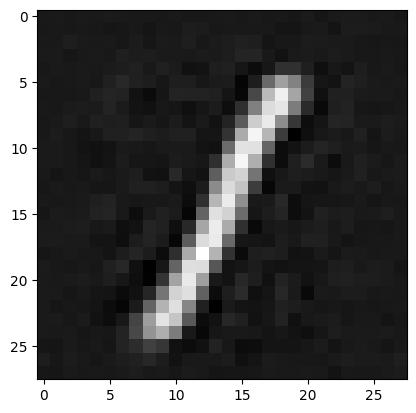

In [12]:
out_img = torch.squeeze(output.cpu().data)
print(out_img.size())

for i in range(10):
    plt.imshow(torch.squeeze(image[i]).cpu().numpy(), cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()